# Разработка A/B-тестирования и анализ результатов

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

In [2]:
# Создаем датафрейм sessions_history
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [3]:
# Выводим первые 5 строк датафрейма
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
# Группируем данные для поиска уникальный сессий
session_id_gp = sessions_history.groupby('user_id')['session_id'].nunique().reset_index().sort_values(by='session_id',ascending = False)

In [5]:
# Смотрим на сгруппированные данные
session_id_gp

,user_id,session_id
8948,10E0DEFC1ABDBBE0,10
55627,6A73CB5566BB494D,10
72346,8A60431A825D035B,9
109383,D11541BAC141FB94,9
47956,5BCFE7C4DCC148E9,9
...,...,...
15859,1DF13BB1953B3497,1
51449,628502A3CE7E0A3C,1
15853,1DEEF40DEFBD0C65,1
89905,AC08479B7472C628,1


In [6]:
# Выводим все данные для одно из пользователей с максимальным количеством сессий
sessions_history[sessions_history['user_id']=='10E0DEFC1ABDBBE0']

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


Промежуточный вывод:
- Наибольшее количество сессий среди всех пользователей - 10 сессий. Столько сессий имеют только 2 пользователя.
- Все сессии одного из пользователей  с наибольшим количеством сессий были произведены с мобильного устройства на операционной системе Android. 
- В 4 сессиях этого пользователя из 10 были просмотрены только 2 страницы.

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [7]:
# Сгруппируем данные для поиска нужных данных
df_grp = sessions_history.groupby('session_date').agg({'user_id':'nunique','registration_flag':'sum'}).reset_index()

In [8]:
# Посмотрим на данные
df_grp

,session_date,user_id,registration_flag
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


In [9]:
# Импортируем библиотеку визуализации данных 
import matplotlib.pyplot as plt

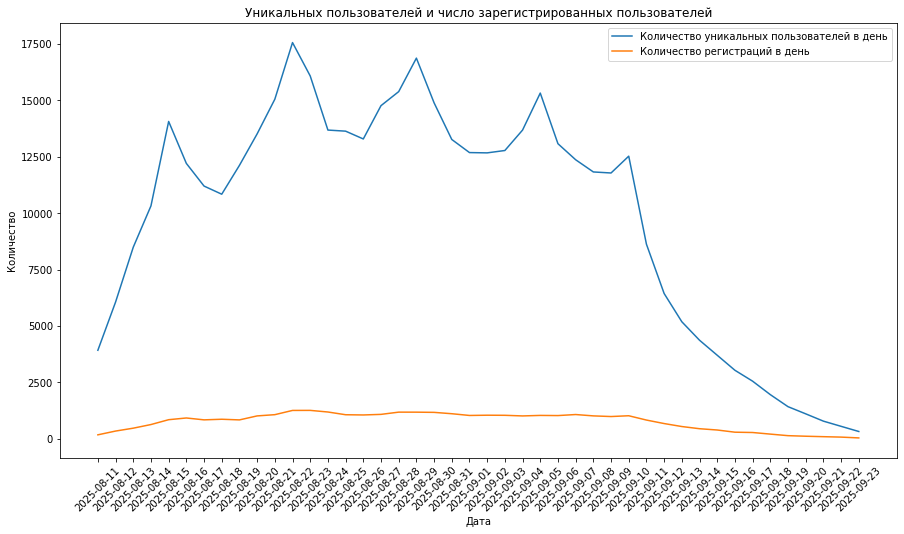

In [10]:
# Строим график уникальных пользователей и числа зарегистрированных пользователей в день
x = df_grp.session_date.unique()
y_a = df_grp['user_id']
y_b = df_grp['registration_flag']

plt.figure(figsize=(15, 8))
plt.plot(x, y_a, label ='Количество уникальных пользователей в день')
plt.plot(x, y_b,label ='Количество регистраций в день')

plt.xlabel("Дата")
plt.ylabel("Количество")
plt.legend()
plt.title('Уникальных пользователей и число зарегистрированных пользователей')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Высчитываем долю зарегистрированных пользователей от всех пользователей по дням
df_grp['registration_share'] = df_grp['registration_flag']/df_grp['user_id']

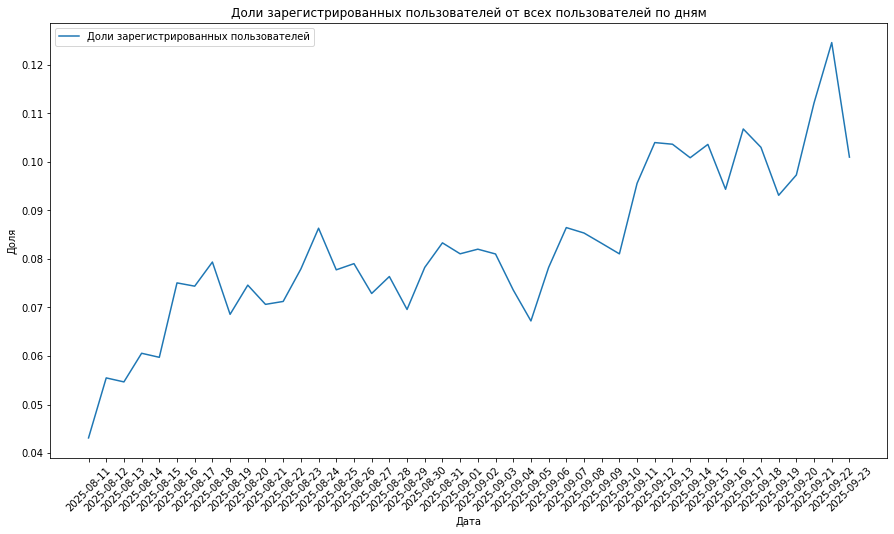

In [12]:
# Строим график доли зарегистрированных пользователей от всех пользователей по дням
x = df_grp.session_date.unique()
y = df_grp['registration_share']

plt.figure(figsize=(15, 8))
plt.plot(x, y, label ='Доли зарегистрированных пользователей')

plt.xlabel("Дата")
plt.ylabel("Доля")
plt.legend()
plt.title('Доли зарегистрированных пользователей от всех пользователей по дням')
plt.xticks(rotation=45)
plt.show()

Промежуточный вывод:
- На основе исторических данных можно увидеть, что пиковые значения уникальных пользователей за день приходились на конец рабочей недели -  с четверга по субботу.
- При это количество регистраций показывает отностиельно равномерное распределение, без резких скачков в значениях 
- Можно отметить скачкообразный рост доли зарегистрированных пользователей от всех пользователей по дням в течение всего исторического отрезка

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [13]:
# Группируем данные и находим нужные значения
uniq_page_counter = sessions_history.groupby('page_counter')['session_id'].count()

In [14]:
# Проверяем полученные данные
uniq_page_counter

page_counter
1     29160
2    105536
3    166690
4    105569
5     26288
6      2589
7        92
Name: session_id, dtype: int64

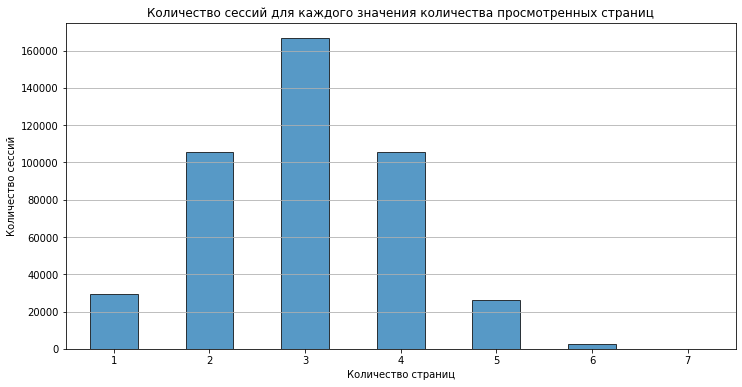

In [15]:
# Строим график
plt.figure(figsize=(12, 6))

uniq_page_counter.plot(
                kind='bar',
                alpha=0.75,
                edgecolor='black',
)


plt.title('Количество сессий для каждого значения количества просмотренных страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Количество сессий')

plt.grid(axis='y')

plt.xticks(rotation=0)
plt.show() 

Промежуточный вывод:
- Большинство сессий ограничивалось просмотрами только трех страниц.
- Сессий с просмотрами семи страниц всего 92-е

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [16]:
# Добавляем новый столбец
sessions_history['good_session'] = 0
sessions_history.loc[sessions_history['page_counter']>=4,'good_session'] = 1

In [17]:
# Проверяем данные
sessions_history

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,good_session
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone,0
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android,1
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC,1
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android,1
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android,0
...,...,...,...,...,...,...,...,...,...,...,...
435919,769BC199AF26FEF8,914903B51D69C5EA,2025-09-17,2025-09-17 21:33:57,2025-09-04,3,1,3,CIS,PC,0
435920,599DED39F3CD2ADE,66ADBE343C94DCDA,2025-09-17,2025-09-17 17:11:46,2025-09-04,4,0,4,MENA,iPhone,1
435921,1FA20C4BC94E64B2,C4CCD7E81733665F,2025-09-17,2025-09-17 19:36:55,2025-09-04,4,0,4,CIS,Android,1
435922,88E5FC3016A7A0AD,6834FB4914B56200,2025-09-17,2025-09-17 22:13:33,2025-09-04,5,0,4,MENA,PC,1


In [18]:
# Группируем данные и образуем нужные столбцы
df_agg = sessions_history.groupby('session_date').agg(session_count = ('session_id','count'),
                                                      good_session_count = ('good_session','sum')).reset_index()


In [19]:
# Находим долю хороших сессий
df_agg['good_session_share'] = df_agg['good_session_count']/df_agg['session_count']

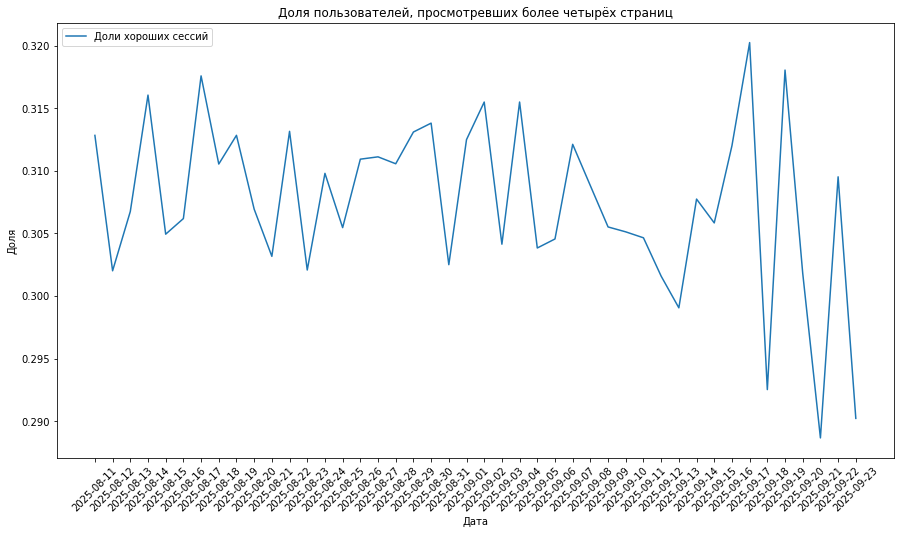

In [20]:
x = df_agg.session_date.unique()
y = df_agg['good_session_share']

plt.figure(figsize=(15, 8))
plt.plot(x, y, label ='Доли хороших сессий')

plt.xlabel("Дата")
plt.ylabel("Доля")
plt.legend()
plt.title('Доля пользователей, просмотревших более четырёх страниц')
plt.xticks(rotation=45)
plt.show()

Промежуточный вывод:
- Не смотря на резкие перепады на графике, значение доли успешных сессий или сессий с 4 и более просмотрами остаётся в диапазоне от 30% до 32%


### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [2]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2 # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03 # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 4360


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [22]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = round(sessions_history['user_id'].nunique()/sessions_history['session_date'].nunique())

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil((17441*2)/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 3046 пользователей в день составит 12 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [23]:
# Сохраняем новый датафрейм
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [24]:
# Группируем данные
test_grp = sessions_test_part.groupby('test_group')['user_id'].nunique().T

In [25]:
# Проверяем данные
test_grp

test_group
A    1477
B    1466
Name: user_id, dtype: int64

In [26]:
# Расчитываем процентную разницу
P = 100 * abs(test_grp['A'] - test_grp['B'])/test_grp['A']

In [27]:
# Выводим значение
P

0.7447528774542993

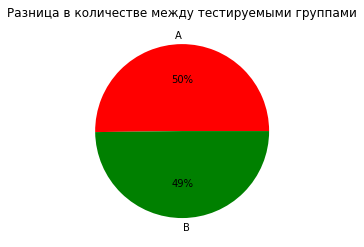

In [28]:
# Строим круговую диаграмму для визуализации разницы между группами
test_grp.plot(
    kind='pie' ,
    title='Разница в количестве между тестируемыми группами',
    autopct='%d%%',
    ylabel= '',
    colors=['red','green']
)

plt.show()

Промежуточный вывод:
- Разница пользователей в тестируемых группах состовляет менее 1% при допустимых 10-15% 

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [29]:
#Проверяем пересечение пользователей в группах
a_group = sessions_test_part[sessions_test_part['test_group']=='A']['user_id']
b_group = sessions_test_part[sessions_test_part['test_group']=='B']['user_id']
#Создаем список пересекающихся пользователей
intersection = list(set(a_group) & set(b_group))
print(intersection) 

[]


Промежуточный вывод:
- Среди выборок нет пересекающихся пользователей. Критерий независимости выполняется

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


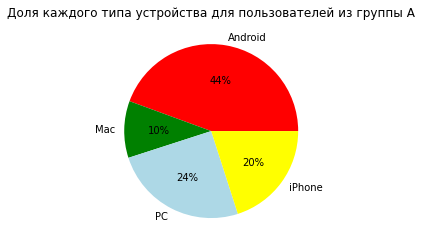

In [30]:
# Круговая диаграмма долей каждого устройства группы А
device_share_a = sessions_test_part[sessions_test_part['test_group']=='A'].groupby('device')['user_id'].nunique()
device_share_a.plot(
    kind='pie' ,
    title='Доля каждого типа устройства для пользователей из группы A',
    autopct='%d%%',
    ylabel= '',
    colors=['red','green','lightblue','yellow']
)

plt.show()

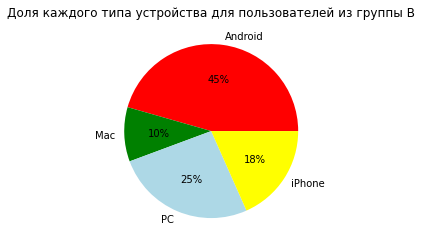

In [31]:
# Круговая диаграмма долей каждого устройства группы В
device_share_b = sessions_test_part[sessions_test_part['test_group']=='B'].groupby('device')['user_id'].nunique()
device_share_b.plot(
    kind='pie' ,
    title='Доля каждого типа устройства для пользователей из группы В',
    autopct='%d%%',
    ylabel= '',
    colors=['red','green','lightblue','yellow']
)

plt.show()

Промежуточный вывод:
- Разница между тестируемыми группами по категориальному параметру типа устройств минимален и не превышает допустимых значений.

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


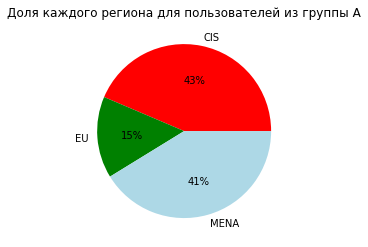

In [32]:
# Круговая диаграмма долей каждого региона группы А
device_share_a = sessions_test_part[sessions_test_part['test_group']=='A'].groupby('region')['user_id'].nunique()
device_share_a.plot(
    kind='pie' ,
    title='Доля каждого региона для пользователей из группы A',
    autopct='%d%%',
    ylabel= '',
    colors=['red','green','lightblue']
)

plt.show()

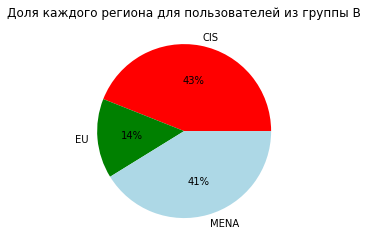

In [33]:
# Круговая диаграмма долей каждого региона группы В
device_share_b = sessions_test_part[sessions_test_part['test_group']=='B'].groupby('region')['user_id'].nunique()
device_share_b.plot(
    kind='pie' ,
    title='Доля каждого региона для пользователей из группы В',
    autopct='%d%%',
    ylabel= '',
    colors=['red','green','lightblue','yellow']
)

plt.show()

Промежуточный вывод:
- Разница между тестируемыми группами по категориальному параметру региона пользователя минимален и не превышает допустимых значений.

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

На основе мониторинга тестирования можно сделать следующие выводы:
- Разница в количестве пользователей в тестируемых группах не превышает одного процента и состовляет 0.74%. В группе А - 1477 пол., в группе В - 1466 пол.
- Пересечений между группами обнаружено не было.
- Прослеживается равномерное распределение пользователей тестируемых групп. Разница между группами по категориальным переменным наблюдается, но остаётся в рамках нормы и не превышает 1-2%  

В связи с выше перечисленными наблюдениями можно сделать вывод, что проводимый A/B-тест проходит успешно.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [34]:
# Сохраняем новый датафрейм
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

In [35]:
# Создаём новый столбец "good_session"
sessions_test['good_session'] = 0
sessions_test.loc[sessions_test['page_counter']>=4,'good_session'] = 1

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [36]:
# количество уникальных сессий для каждого дня в группе А
session_count_a = sessions_test[sessions_test['test_group']=='A'].groupby('session_date')['session_id'].nunique()
session_count_a

session_date
2025-10-14    1502
2025-10-15    2235
2025-10-16    3280
2025-10-17    4089
2025-10-18    5013
2025-10-19    6535
2025-10-20    5837
2025-10-21    3927
2025-10-22    3083
2025-10-23    2470
2025-10-24    2090
2025-10-25    1897
2025-10-26    1669
2025-10-27    1454
2025-10-28    1279
2025-10-29    1068
2025-10-30     887
2025-10-31     644
2025-11-01     434
2025-11-02     158
Name: session_id, dtype: int64

In [37]:
# количество уникальных сессий для каждого дня в группе В
session_count_b = sessions_test[sessions_test['test_group']=='B'].groupby('session_date')['session_id'].nunique()
session_count_b

session_date
2025-10-14    1628
2025-10-15    2283
2025-10-16    3241
2025-10-17    4054
2025-10-18    5059
2025-10-19    6779
2025-10-20    6089
2025-10-21    3981
2025-10-22    3111
2025-10-23    2548
2025-10-24    2068
2025-10-25    1814
2025-10-26    1692
2025-10-27    1517
2025-10-28    1289
2025-10-29    1131
2025-10-30     876
2025-10-31     669
2025-11-01     465
2025-11-02     160
Name: session_id, dtype: int64

In [38]:
# Статистический тест для проверки различий в тестовых группах
from scipy.stats import ttest_ind
test_result = ttest_ind(
    session_count_a,
    session_count_b,
    alternative='two-sided' 
)

# Фиксируем уровень значимости
alpha = 0.05

if test_result.pvalue > alpha:
    print(f'pvalue={test_result.pvalue} > {alpha}')
    print('Отличий либо слишком мало, либо нет совсем')
else:
    print(f'pvalue={test_result.pvalue} < {alpha}')
    print('Присутствуют отличия в данных между тестируемыми группами') 

pvalue=0.938219304859116 > 0.05
,Отличий либо слишком мало, либо нет совсем


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [39]:
group_a = sessions_test[sessions_test['test_group']=='A']
all_sessions = group_a['session_id'].nunique()
good_group_a = group_a[group_a['good_session']==1]['session_id'].count()
good_session_share_a = good_group_a/all_sessions*100
good_session_share_a

30.772335573449578

In [40]:
group_b = sessions_test[sessions_test['test_group']=='B']
all_sessions = group_b['session_id'].nunique()
good_group_b = group_b[group_b['good_session']==1]['session_id'].count()
good_session_share_b = good_group_b/all_sessions*100
good_session_share_b

31.828992745867524

In [41]:
dif = round(good_session_share_b - good_session_share_a,1)
print(f'Разница в долях успешных сессий между группами состовляет {dif}% в пользу тестовой группы ')

Разница в долях успешных сессий между группами состовляет 1.1% в пользу тестовой группы 


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [42]:
# Проведём Z-тест пропорций  и попробуем выяснить является ли изменение в метрике доли успешных сессий статистически значимым
from statsmodels.stats.proportion import proportions_ztest


n_a = sessions_test[ 
    sessions_test.test_group=='A'
].shape[0] 

n_b = sessions_test[ 
    sessions_test.test_group=='B'
].shape[0]

m_a = sessions_test[ 
    (sessions_test.test_group=='A')&(sessions_test.good_session==1)
].shape[0] 

m_b = sessions_test[ 
    (sessions_test.test_group=='B')&(sessions_test.good_session==1)
].shape[0]



stat_ztest, p_value_ztest = proportions_ztest( 
    [m_a,m_b],
    [n_a,n_b],
	alternative='smaller'
)

alpha = 0.05

print(f'pvalue={p_value_ztest}') 

if p_value_ztest > alpha:
    print('Нововведение не показало эффекта')
    text_interpretation = 'не изменилось' 
else:
    print('Нововведение показало эффект')
    text_interpretation = 'сократилось'

pvalue=0.0001574739988036123
,Нововведение показало эффект


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

После проведения A/B-теста нового алгоритма рекомендаций можно подвести следующие итоги:
- Продолжительность теста состовляла 12 дней. Для каждой тестируемой группы потребовалось 17441 пользователь или 34882 пользователя в сумме.
- В обеих тестируемых группах удалось соблюсти равновмерное распределение данных по категориальным параметрам.
- Наблюдается эффект от нового алгоритма рекомендаций. Процент успешних сессий в тестовой группе, в которых пользователи просматривают 4 и больше страниц, увеличился на 1.1% по сравнению с пользователями из контрольной группы со старым алгоритмом.
- Был проведен Z-тест пропорций, который бы дал возможность оценить статистическую значимость увеличению процента успешных сессий.
- Внедрение нововведения ненамного увеличит процент успешных сессий. Новый алгоритм рекомендаций стоит внедрить в приложение.